In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name 'XGBClassifier' from 'sklearn.ensemble' (c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\sklearn\ensemble\__init__.py)

In [4]:
data = pd.read_csv('../data/water_quality.csv')


In [5]:
# Separate features and target
X = data.drop(columns=['Label'])
y = data['Label']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [10]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [11]:
lr_model = LogisticRegression()


In [12]:
svc_model = SVC(probability=True, random_state=42)


In [13]:
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('lr', lr_model), 
    ('svc', svc_model)
], voting='soft')

In [ ]:
voting_clf.fit(X_train, y_train)


In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [17]:
# Best parameters found by GridSearch
print("Best Params for Random Forest:", grid_search.best_params_)

Best Params for Random Forest: {'max_depth': 5, 'n_estimators': 200}


In [18]:
# Evaluating the model
y_pred = voting_clf.predict(X_test)

In [19]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5545813239807103


In [20]:
# AUC-ROC Score (assuming binary classification)
roc_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.6121034858186785


In [21]:
# Cross-validation to check model robustness
cv_scores = cross_val_score(voting_clf, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)

Cross-validation accuracy scores: [0.64971504 0.52301622 0.51403509 0.5        0.55570175]


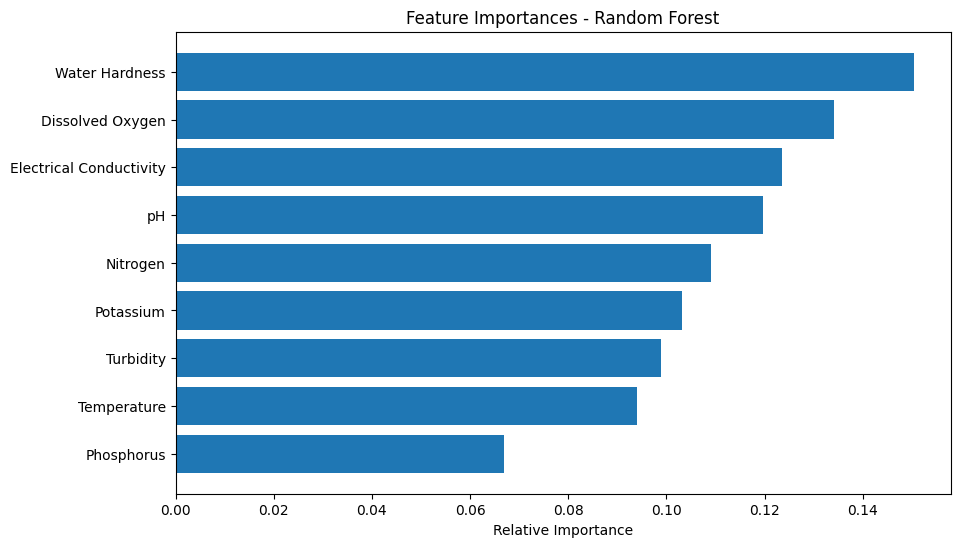

In [24]:
# Fit the RandomForest model (separate from the Voting Classifier)
rf_model.fit(X_train, y_train)

# Feature importance (for Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()


In [26]:
# Fit the XGBoost model (before evaluating it)
xgb_model.fit(X_train, y_train)

# Evaluate individual models
print("Random Forest Accuracy on Test Set:", accuracy_score(y_test, rf_model.predict(X_test)))
print("XGBoost Accuracy on Test Set:", accuracy_score(y_test, xgb_model.predict(X_test)))


Random Forest Accuracy on Test Set: 0.5563349408154318
XGBoost Accuracy on Test Set: 0.5585269618588339


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:37:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],  # Depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of trees
    'subsample': [0.8, 1.0],  # Fraction of samples to use for training
    'colsample_bytree': [0.8, 1.0],  # Fraction of features to use for each tree
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best XGBoost Accuracy on Test Set after Hyperparameter Tuning:", accuracy)


Best XGBoost Accuracy on Test Set after Hyperparameter Tuning: 0.562034195528277


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [30]:
from sklearn.preprocessing import StandardScaler

# Scale features to standardize them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the model using scaled features
best_xgb_model.fit(X_train_scaled, y_train)
y_pred = best_xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy with Scaled Features:", accuracy)


XGBoost Accuracy with Scaled Features: 0.562034195528277


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [31]:
from sklearn.model_selection import cross_val_score

# Evaluate using 5-fold cross-validation
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not u

Cross-validation Scores: [0.57808219 0.56304825 0.58333333 0.54660088 0.5564693 ]
Mean Cross-validation Accuracy: 0.5655067892333573


In [32]:
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, scale_pos_weight=1)  # Change scale_pos_weight based on class imbalance


In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model with resampled data
best_xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_xgb_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy with SMOTE:", accuracy)


XGBoost Accuracy with SMOTE: 0.5681718544498027


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:44:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


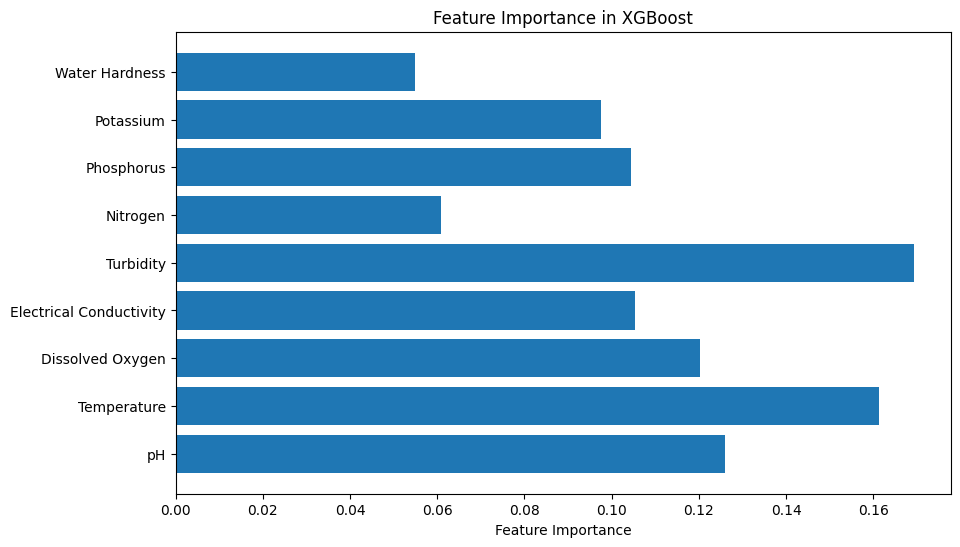

In [43]:
# If X_train is a NumPy array, use a list of feature names
feature_names = ['pH', 'Temperature', 'Dissolved Oxygen', 'Electrical Conductivity', 'Turbidity', 
                 'Nitrogen', 'Phosphorus', 'Potassium', 'Water Hardness']  # Replace with your actual feature names

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost")
plt.show()


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Set parameters if necessary
xgb_model.fit(X_train, y_train)  # Fit the model with training data

# Now make predictions with the trained XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy for XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Print XGBoost accuracy
print(f"XGBoost Accuracy on Test Set: {xgb_accuracy:.4f}")

# For Random Forest (if it's also not trained yet, make sure to fit it first)
rf_model.fit(X_train, y_train)  # Fit Random Forest model if not fitted
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print Random Forest accuracy
print(f"Random Forest Accuracy on Test Set: {rf_accuracy:.4f}")


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on Test Set: 0.5585
Random Forest Accuracy on Test Set: 0.5563


In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create a VotingClassifier with Random Forest and XGBoost models
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'  # 'hard' for hard voting, 'soft' for soft voting
)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Get the accuracy for the Voting Classifier
voting_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))
print(f"Voting Classifier Accuracy on Test Set: {voting_accuracy}")


Voting Classifier Accuracy on Test Set: 0.559842174484875


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [51]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the base models
base_models = [
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# Create a StackingClassifier with Logistic Regression as the meta-model
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()  # Logistic Regression as the meta-model
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Get the accuracy for the Stacking Classifier
stacking_accuracy = accuracy_score(y_test, stacking_clf.predict(X_test))
print(f"Stacking Classifier Accuracy on Test Set: {stacking_accuracy}")


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:59:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy on Test Set: 0.5550197281893906


c:\Users\UGH\Desktop\Water_Quality_monitoringV2\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [52]:
# Evaluate Random Forest accuracy
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# Evaluate XGBoost accuracy
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# Print accuracies for all models
print(f"Random Forest Accuracy on Test Set: {rf_accuracy}")
print(f"XGBoost Accuracy on Test Set: {xgb_accuracy}")
print(f"Voting Classifier Accuracy on Test Set: {voting_accuracy}")
print(f"Stacking Classifier Accuracy on Test Set: {stacking_accuracy}")


Random Forest Accuracy on Test Set: 0.5563349408154318
XGBoost Accuracy on Test Set: 0.5585269618588339
Voting Classifier Accuracy on Test Set: 0.559842174484875
Stacking Classifier Accuracy on Test Set: 0.5550197281893906


In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Create the voting classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lr', lr_model), ('svm', svm_model)],
    voting='soft'  # Use soft voting (average predicted probabilities)
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate accuracy on test set
voting_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))
print(f"Voting Classifier Accuracy on Test Set: {voting_accuracy}")


Voting Classifier Accuracy on Test Set: 0.5523893029373081


In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Create the stacking classifier with Logistic Regression as meta-model
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lr', lr_model), ('svm', svm_model)],
    final_estimator=LogisticRegression()  # Meta-model
)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Evaluate accuracy on test set
stacking_accuracy = accuracy_score(y_test, stacking_clf.predict(X_test))
print(f"Stacking Classifier Accuracy on Test Set: {stacking_accuracy}")


Stacking Classifier Accuracy on Test Set: 0.5515124945199474


In [55]:
print(y_train.value_counts())


Label
0    4573
1    4548
Name: count, dtype: int64


In [56]:
rf_model = RandomForestClassifier(class_weight='balanced')


In [57]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
